In [219]:
import pandas as pd

In [226]:
inv = pd.read_csv('fct_invoice.csv')
cus = pd.read_json('dim_customer.json')

In [236]:
# Easy 1. How many unique customers are in the dataset?

unique_customers = cus['customer_id'].nunique()

print('1. How many unique customers are in the dataset? answer: ', unique_customers)

1. How many unique customers are in the dataset? answer:  5191


In [229]:
# Easy 2. What are the different categories of products available? How many unique categories are there?

list_unique_products = inv['category'].unique()
n_unique_products = inv['category'].nunique() 

print('2.')
print('What are the different categories of products available? answer: ', list_unique_products)
print('How many unique categories are there? answer: ', n_unique_products)

2.
What are the different categories of products available? answer:  ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
How many unique categories are there? answer:  8


In [230]:
# Easy 3. Which payment method is the most popular? How many times was it used?

popular = inv['payment_method'].value_counts().head(1).index[0]
popular_count = (inv['payment_method'] == popular).sum()

print( '# 3.')
print( 'Which payment method is the most popular? answer: ', popular)
print('How many times was it used? answer: ', popular_count)


# 3.
Which payment method is the most popular? answer:  Cash
How many times was it used? answer:  44447


In [231]:
# Medium 1. What are the three most popular categories, by total sales?

inv['sales'] = inv['quantity'] * inv['price']

top3_cat = inv.groupby(['category'])['sales'].sum().sort_values(ascending=False).head(3).index.tolist()

print("What are the three most popular categories, by total sales? answer: ", top3_cat)

What are the three most popular categories, by total sales? answer:  ['Clothing', 'Shoes', 'Technology']


In [232]:
# Medium 2. What are the total sales attributed to customers over the age of 45?

cus = cus.rename(columns={'id': 'customer_id'})
inv_cus = pd.merge(inv, cus, on='customer_id') 

sales_o45 = inv_cus[inv_cus['age'] > 45]['sales'].sum()

print( 'What are the total sales attributed to customers over the age of 45? answer: ', sales_o45)

What are the total sales attributed to customers over the age of 45? answer:  82039768.15


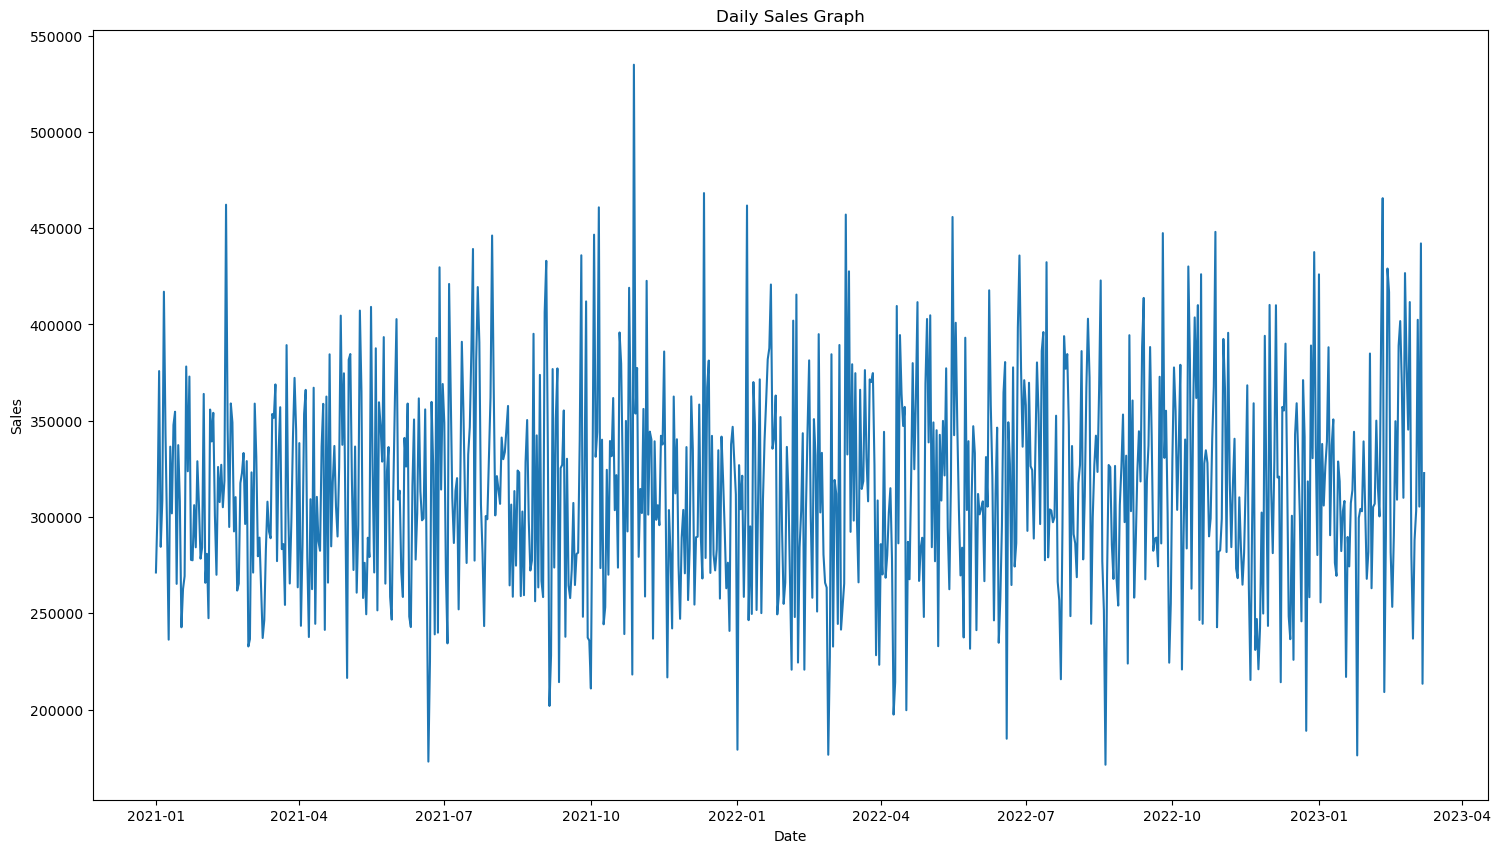

How is the data distributed across different invoice dates? answer:  Graph is Shown
Are there any seasonal trends or patterns? answer:  the data seems to be volatile and spontaneously changes day-by-day. thus i believe that there are no seasonal trends or patterns


In [233]:
# Medium 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

import matplotlib as plt

inv_cus['invoice_newdate'] = pd.to_datetime(inv_cus['invoice_date'], dayfirst = True)

daily_sales = inv_cus.groupby(['invoice_newdate'])['sales'].sum()

plt.figure(figsize=(18,10))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Daily Sales Graph')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

print('How is the data distributed across different invoice dates? answer: ', 'Graph is Shown')
print('Are there any seasonal trends or patterns? answer: ', 'the data seems to be volatile and spontaneously changes day-by-day. thus i believe that there are no seasonal trends or patterns')

In [58]:
# Hard 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

cus = cus.rename(columns={'id': 'customer_id'})
inv_cus = pd.merge(inv, cus, on='customer_id')
inv_cus = inv_cus.dropna(subset=["age"])

inv_cus["age_range"] = pd.cut(inv_cus["age"], bins=range(10, 100, 10), right=False)

inv_cus["total"] = inv_cus["price"] * inv_cus["quantity"]

result = inv_cus.groupby(["category", "age_range"], observed = False)["total"].sum().reset_index()

pd.set_option('display.max_rows', None)
 
print(result)


           category age_range        total
0             Books  [10, 20)     12801.75
1             Books  [20, 30)     79461.75
2             Books  [30, 40)     84143.10
3             Books  [40, 50)     87203.40
4             Books  [50, 60)     74962.20
5             Books  [60, 70)     80476.80
6             Books  [70, 80)     54827.85
7             Books  [80, 90)     26664.00
8          Clothing  [10, 20)   1927413.84
9          Clothing  [20, 30)  10250732.80
10         Clothing  [30, 40)  11354126.96
11         Clothing  [40, 50)  11215189.92
12         Clothing  [50, 60)  10321851.76
13         Clothing  [60, 70)  10660642.08
14         Clothing  [70, 80)   7769371.28
15         Clothing  [80, 90)   4493698.00
16        Cosmetics  [10, 20)    109619.36
17        Cosmetics  [20, 30)    605915.32
18        Cosmetics  [30, 40)    723544.70
19        Cosmetics  [40, 50)    665034.96
20        Cosmetics  [50, 60)    587780.96
21        Cosmetics  [60, 70)    649990.76
22        C